# 📌 K-Nearest Neighbors (KNN) לסיווג

## **מבוא**
בבעיות סיווג, המטרה היא **לנבא את הקטגוריה** אליה שייכת תצפית חדשה, בהתבסס על התצפיות הקיימות.  
במקום להעריך משתנה כמותי (\($ Y$ \) רציף), כמו ברגרסיה, אנו מתמקדים **במשתנים קטגוריים**.

לדוגמה, אם נרצה לקבוע האם לקוח **יבצע ברירת מחדל בהלוואה ($Yes/No$)**, נוכל להשתמש בתכונות כמו **הכנסה ויתרה ממוצעת** כדי לסווג אותו.

---

## **📌 עקרון הפעולה של $KNN$ בסיווג**
1. בוחרים **מספר שכנים \( $K$ \)**.
2. מזהים **את \( $K$ \) התצפיות הקרובות ביותר** לנקודת התחזית \($ x_0 $\).
3. קובעים **את הקטגוריה הדומיננטית** מבין ה-\( $K$ \) השכנים לפי רוב קולות:

$$ \hat{P}(Y = j | X = x_0) = \frac{1}{K} \sum_{x_i \in N_K (x_0)} I (y_i = j)
$$

📌 **התחזית תהיה הקטגוריה בעלת ההסתברות הגבוהה ביותר מבין השכנים**.

---

## **📌 סיווג $Bayes$ - מדד אידיאלי**
**סיווג $Bayes$** הוא **הסיווג התאורטי האופטימלי**, שבו התצפית מסווגת למחלקה בעלת ההסתברות המותנית הגבוהה ביותר:

$$
P(Y = j | X = x_0)
$$

במקרה של **שתי קטגוריות ($Yes/No$, $Class 1/Class 2$)**, מסווגים לקטגוריה **אם ההסתברות שלה גבוהה מ-50%**:

$$
P(Y = 1 | X = x_0) > 0.5
$$

📌 **בעולם האמיתי, איננו יודעים את ההתפלגות האמיתית, ולכן $KNN$ נחשב לקירוב של סיווג Bayes.**



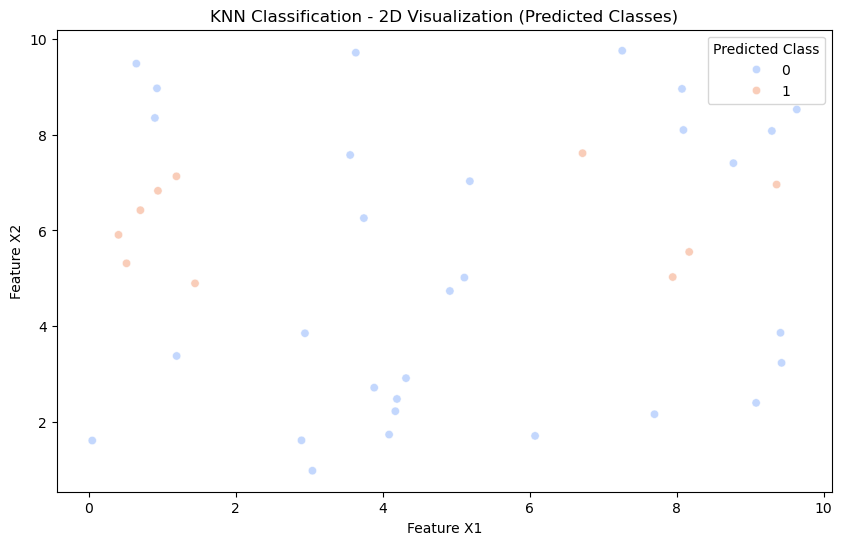

Accuracy: 0.93
Confusion Matrix:
 [[29  2]
 [ 1  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        31
           1       0.80      0.89      0.84         9

    accuracy                           0.93        40
   macro avg       0.88      0.91      0.90        40
weighted avg       0.93      0.93      0.93        40



In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# יצירת נתוני סיווג דו-ממדיים
np.random.seed(42)
X = np.random.rand(200, 2) * 10  # שני משתנים בלתי תלויים
Y = (np.sin(X[:, 0]) + np.cos(X[:, 1]) > 1).astype(int)  # קביעה בינארית למחלקות

# חלוקה לסט אימון וסט בדיקה
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# נרמול הנתונים לשיפור ביצועי KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# יצירת מודל KNN עם K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, Y_train)

# חיזוי על סט הבדיקה
Y_pred = knn.predict(X_test_scaled)

# ==========================
# גרף 1: תוצאה דו-ממדית של KNN
# ==========================

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=Y_pred, palette="coolwarm", alpha=0.7)
plt.xlabel("Feature X1")
plt.ylabel("Feature X2")
plt.title("KNN Classification - 2D Visualization (Predicted Classes)")
plt.legend(title="Predicted Class")
plt.show()

# ==========================
# חישוב ביצועי המודל
# ==========================

print(f"Accuracy: {accuracy_score(Y_test, Y_pred):.2f}")
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

---

## **📌 בחירת \( $K$ \) ומשמעותו בסיווג**
|י \( $K$ \) קטן (למשל, \( $K=1$ \)) | י\( $K$ \) גדול (למשל, \( $K=20$ \)) |
|----------------|----------------|
| רגיש מאוד לרעש | מתעלם מרעש ולומד הכללה |
| שונות גבוהה ($Overfitting$) | שונות נמוכה ($Underfitting$) |
| החלטות מבוססות בעיקר על נקודות ספציפיות | החלטות חלקות יותר על פני הקטגוריות |

📌 **ערך אופטימלי של \( $K$ \) נבחר באמצעות קרוס-ולידציה.**

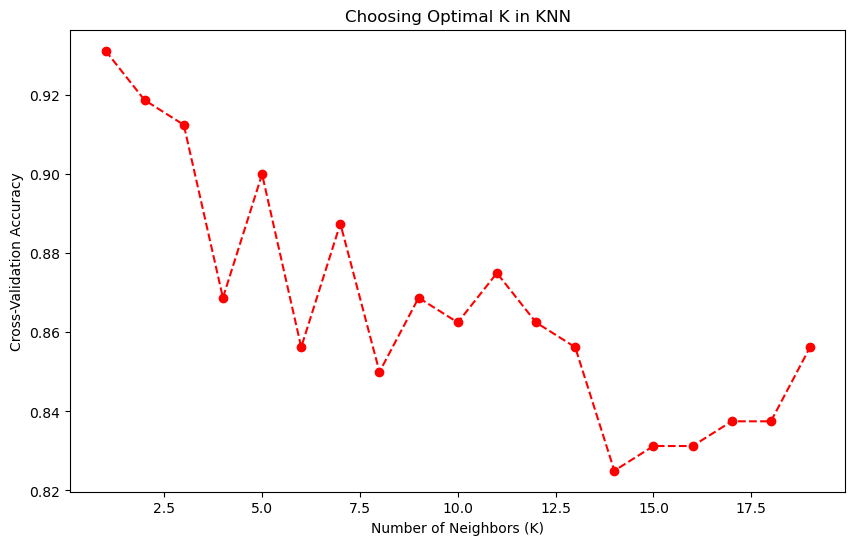

Optimal K: 1


In [2]:
# חיפוש הערך האופטימלי של K באמצעות קרוס-ולידציה
k_values = range(1, 20)
accuracy_scores = []

for k in k_values:
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_cv, X_train_scaled, Y_train, cv=10, scoring='accuracy')
    accuracy_scores.append(scores.mean())

# גרף של ביצועי KNN בהתאם ל-K
plt.figure(figsize=(10,6))
plt.plot(k_values, accuracy_scores, marker="o", linestyle="dashed", color="red")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Choosing Optimal K in KNN")
plt.show()

# הצגת הערך האופטימלי של K
optimal_k = k_values[np.argmax(accuracy_scores)]
print(f"Optimal K: {optimal_k}")

# 📌 טיפול בבעיית חוסר איזון בקבוצות בסיווג KNN

## **📌 מה קורה כאשר יש לנו קבוצה גדולה וקבוצה קטנה?**
בבעיות סיווג באמצעות $KNN$, אם אחת מהקטגוריות (המחלקות) גדולה משמעותית מהשנייה, האלגוריתם **עשוי להעדיף את המחלקה הדומיננטית**.  
בעיה זו נקראת **חוסר איזון בנתונים ($Class Imbalance$)**, והיא עלולה להוביל לדיוק גבוה אך לתפקוד ירוד של המודל.

### 🔹 **מה קורה בפועל?**
- אם \( $K$ \) קטן, הסיווג יתבסס בעיקר על מחלקת הרוב.
- ככל ש-\( $K$ \) גדל, הסיכוי שהמודל יכלול גם תצפיות ממחלקת המיעוט **גובר**, אך עדיין יש סיכוי לעיוות.


✔ י$KNN$ רגיש מאוד לחוסר איזון בנתונים – מחלקות גדולות משפיעות יותר על ההחלטות.
✔ ניתן לתקן זאת ע”י משקלות, דגימה חוזרת ($Oversampling$), או דגימה מופחתת ($Undersampling$).
✔ שימוש ב-$SMOTE$ או הפחתת מחלקת הרוב יכולים לשפר משמעותית את דיוק המודל במחלקת המיעוט.

📌 באמצעות טכניקות אלו ניתן להבטיח שסיווג $KNN$ יעבוד היטב גם על קבוצות לא מאוזנות! 🚀

---

## **📌 פתרונות להתמודדות עם חוסר איזון בקבוצות**
### **1️⃣ שימוש במשקלות ל-$KNN$**
במקום להשתמש ב-$KNN$ רגיל, ניתן **להעניק משקל גדול יותר לשכנים ממחלקת המיעוט**, כך שהמודל יתחשב בהם בצורה הוגנת.



Accuracy: 0.86
Confusion Matrix:
 [[171   8]
 [ 20   1]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.96      0.92       179
         1.0       0.11      0.05      0.07        21

    accuracy                           0.86       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.81      0.86      0.83       200



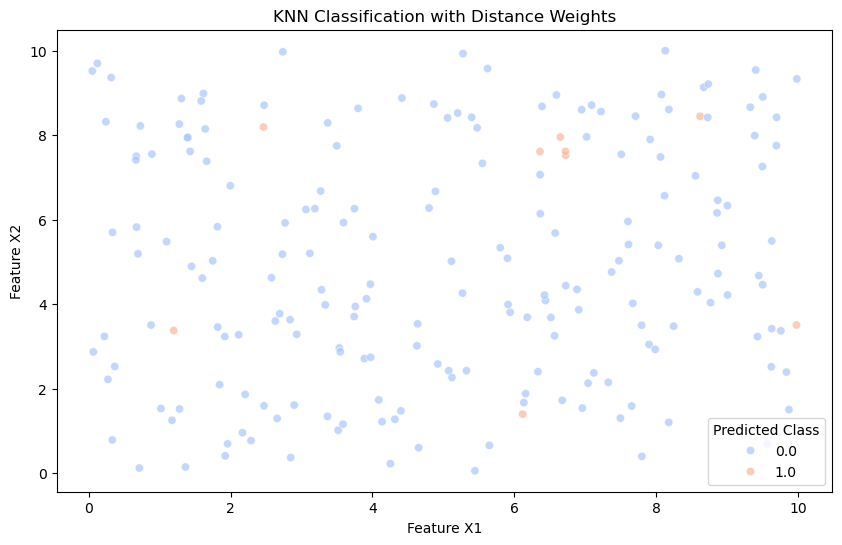

In [3]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# יצירת נתוני סיווג לא מאוזנים
np.random.seed(42)
X_majority = np.random.rand(900, 2) * 10  # קבוצה גדולה (מחלקה 0)
X_minority = np.random.rand(100, 2) * 10  # קבוצה קטנה (מחלקה 1)
X = np.vstack((X_majority, X_minority))  # שילוב הנתונים
Y = np.hstack((np.zeros(900), np.ones(100)))  # תוויות 0 ו-1

# חלוקה לסט אימון וסט בדיקה
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# נרמול הנתונים לשיפור ביצועי KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# יצירת מודל KNN עם משקלות הפוכים לגודל המחלקה
knn_weighted = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_weighted.fit(X_train_scaled, Y_train)

# חיזוי על סט הבדיקה
Y_pred_weighted = knn_weighted.predict(X_test_scaled)

# ==========================
# חישוב ביצועי המודל
# ==========================

print(f"Accuracy: {accuracy_score(Y_test, Y_pred_weighted):.2f}")
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_weighted))
print("Classification Report:\n", classification_report(Y_test, Y_pred_weighted))

# ==========================
# גרף פיזור עם צבעים לפי סיווג
# ==========================

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=Y_pred_weighted, palette="coolwarm", alpha=0.7)
plt.xlabel("Feature X1")
plt.ylabel("Feature X2")
plt.title("KNN Classification with Distance Weights")
plt.legend(title="Predicted Class")
plt.show()

 ### 2. שימוש בדגימה חוזרת (Oversampling)

במקום לשנות את האלגוריתם, ניתן להגדיל את מחלקת המיעוט על ידי שכפול נתוניה או שימוש באלגוריתמים כמו $SMOTE$.י 

Class distribution after SMOTE: Counter({0.0: 900, 1.0: 900})


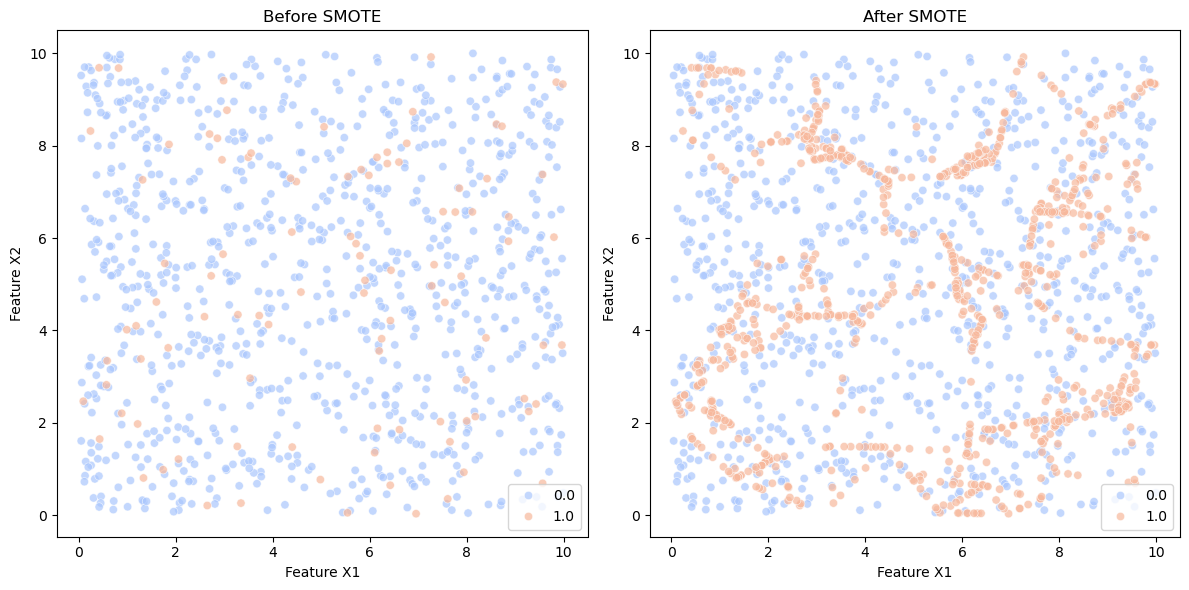

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter

# יצירת נתוני סיווג לא מאוזנים
np.random.seed(42)
X_majority = np.random.rand(900, 2) * 10  # קבוצה גדולה (מחלקה 0)
X_minority = np.random.rand(100, 2) * 10  # קבוצה קטנה (מחלקה 1)
X = np.vstack((X_majority, X_minority))  # שילוב הנתונים
Y = np.hstack((np.zeros(900), np.ones(100)))  # תוויות 0 ו-1

# ביצוע SMOTE להגדלת מחלקת המיעוט
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

# הדפסת התפלגות מחלקות לאחר SMOTE
print("Class distribution after SMOTE:", Counter(Y_resampled))

# ==========================
# גרף פיזור לפני ואחרי SMOTE
# ==========================

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# לפני SMOTE
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, palette="coolwarm", alpha=0.7, ax=axes[0])
axes[0].set_title("Before SMOTE")
axes[0].set_xlabel("Feature X1")
axes[0].set_ylabel("Feature X2")

# אחרי SMOTE
sns.scatterplot(x=X_resampled[:, 0], y=X_resampled[:, 1], hue=Y_resampled, palette="coolwarm", alpha=0.7, ax=axes[1])
axes[1].set_title("After SMOTE")
axes[1].set_xlabel("Feature X1")
axes[1].set_ylabel("Feature X2")

plt.tight_layout()
plt.show()


 ### 3. הקטנת מחלקת הרוב (Undersampling)

במקום להגדיל את מחלקת המיעוט, ניתן להקטין את מחלקת הרוב כדי לאזן את הנתונים.

Class distribution after Undersampling: Counter({0.0: 100, 1.0: 100})


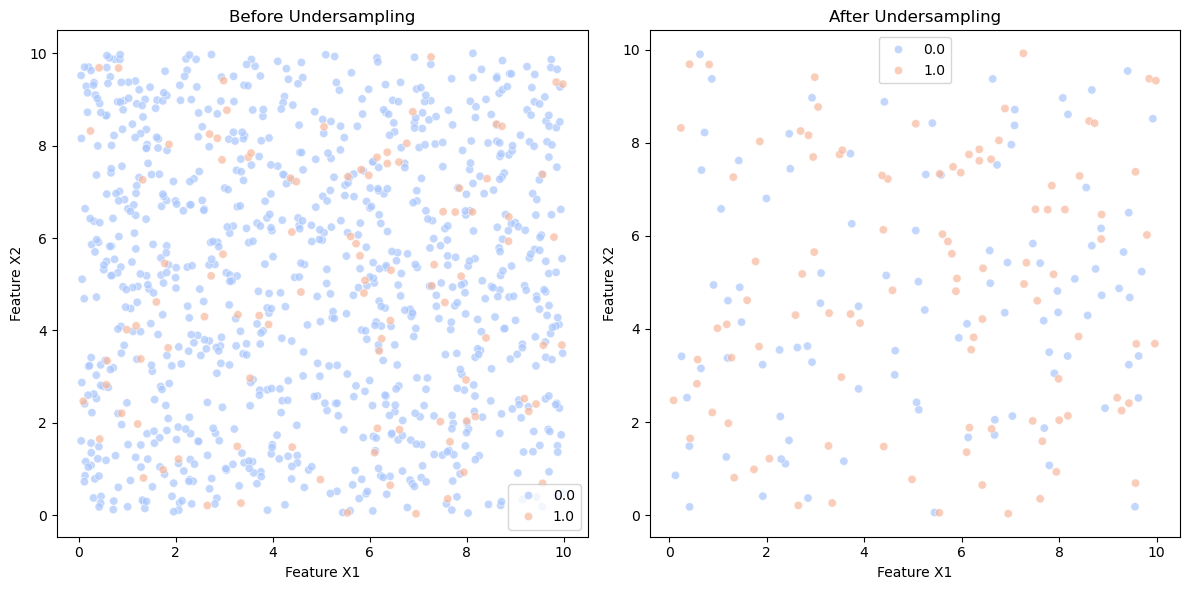

In [10]:
from imblearn.under_sampling import RandomUnderSampler

# ביצוע undersampling למחלקת הרוב
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, Y_resampled = undersample.fit_resample(X, Y)

# הדפסת התפלגות מחלקות לאחר Undersampling
print("Class distribution after Undersampling:", Counter(Y_resampled))

# ==========================
# גרף פיזור לפני ואחרי Undersampling
# ==========================

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# לפני Undersampling
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, palette="coolwarm", alpha=0.7, ax=axes[0])
axes[0].set_title("Before Undersampling")
axes[0].set_xlabel("Feature X1")
axes[0].set_ylabel("Feature X2")

# אחרי Undersampling
sns.scatterplot(x=X_resampled[:, 0], y=X_resampled[:, 1], hue=Y_resampled, palette="coolwarm", alpha=0.7, ax=axes[1])
axes[1].set_title("After Undersampling")
axes[1].set_xlabel("Feature X1")
axes[1].set_ylabel("Feature X2")

plt.tight_layout()
plt.show()
